In [ ]:

!python -m pip install --upgrade pip

# Sección nueva

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install kagglehub[pandas-datasets]>=0.3.8 geopy

In [ ]:

import kagglehub
import zipfile
import os
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt

In [ ]:
class Pad_clase:
    def __init__(self):
        pass

    def download_dataset_zip(self,url = ""):
        print("Descargando dataset desde Kaggle...")
        dataset_path = kagglehub.dataset_download(url)
        print("Ruta al dataset:", dataset_path)
        return dataset_path

    def extract_zip_files(self,dataset_path):
        zip_files = [f for f in os.listdir(dataset_path) if f.endswith('.zip')]
        if zip_files:
            zip_file = os.path.join(dataset_path, zip_files[0])
            extract_dir = os.path.join(dataset_path, "extracted")
            os.makedirs(extract_dir, exist_ok=True)
            print(f"Extrayendo {zip_file} en {extract_dir}...")
            with zipfile.ZipFile(zip_file, "r") as z:
                z.extractall(extract_dir)
            return extract_dir
        else:
            # Si no se encuentra un ZIP, se verifica si existen archivos CSV en la ruta
            csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
            if csv_files:
                print("No se encontró archivo ZIP pero se detectaron archivos CSV; se asume que el dataset ya se encuentra extraído.")
                return dataset_path
            else:
                raise FileNotFoundError("No se encontró ningún archivo .zip ni archivos .csv en la ruta del dataset")

    def create_csv(self,csv_dir):
        #os.makedirs('src/static/csv', exist_ok=True)
        csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]
        if not csv_files:
            raise FileNotFoundError("No se encontraron archivos CSV en el directorio extraído")

        for file in csv_files:
            file_path = os.path.join(csv_dir, file)
            print(f"Leyendo {file_path}...")
            try:
                df = pd.read_csv(file_path, encoding="latin1")
            except Exception as e:
                print(f"Error al leer {file}: {e}")
                continue
            print(f"Creando/actualizando ")
        print("cvs creado correctamente en ")
        return df

    def columna_regex(self,df_datos =pd.DataFrame(), reg = r"",columna ="",n_columnas = []):
        df = df_datos.copy()
        df[n_columnas] = df[columna].str.extract(reg).astype(int)
        return df



In [ ]:
padclase = Pad_clase()
dataset_path = padclase.download_dataset_zip("smayanj/netflix-users-database")
csv_dir = padclase.extract_zip_files(dataset_path)
df = padclase.create_csv(csv_dir)

Descargando dataset desde Kaggle...
Ruta al dataset: /root/.cache/kagglehub/datasets/smayanj/netflix-users-database/versions/1
No se encontró archivo ZIP pero se detectaron archivos CSV; se asume que el dataset ya se encuentra extraído.
Leyendo /root/.cache/kagglehub/datasets/smayanj/netflix-users-database/versions/1/netflix_users.csv...
Creando/actualizando 
cvs creado correctamente en 


#Dataset de usuarios de netflix

realizar limpieza (Nulos o NaNs o Vacios , Caracteres espaciales)



In [ ]:
!pip install matplotlib

In [ ]:
df.head()

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14


In [ ]:
df.dropna()#limpieza de caracter especial

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14
...,...,...,...,...,...,...,...,...
24995,24996,David Miller,18,Australia,Premium,183.88,Horror,2025-01-18
24996,24997,Jane Miller,17,USA,Premium,112.37,Drama,2024-06-29
24997,24998,Sarah Miller,14,USA,Premium,351.80,Action,2024-10-16
24998,24999,Michael Williams,71,USA,Basic,655.89,Action,2024-08-27


#visualizacion


<Axes: xlabel='Age', ylabel='Country'>

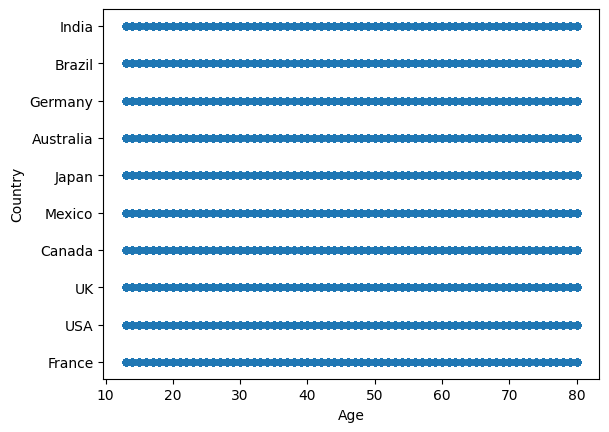

In [ ]:
df.plot.scatter(x='Age', y='Country')# se muestra edad sobre los usuarios de netflix en cada pais


#analisis de datos

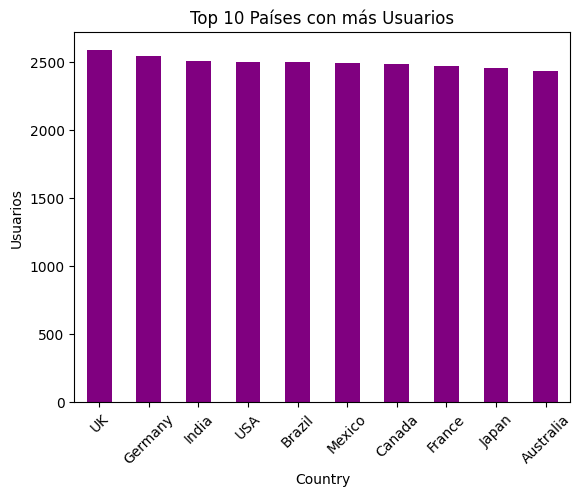

In [ ]:
df['Country'].value_counts().head(10).plot(kind='bar', color='purple')#se realizo un analisis de cual pais tiene mas usuarios
plt.title('Top 10 Países con más Usuarios')
plt.ylabel('Usuarios')
plt.xticks(rotation=45)
plt.show()

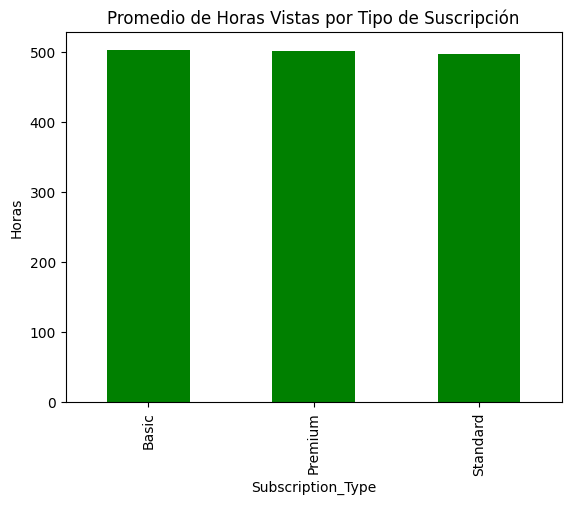

In [ ]:
df.groupby('Subscription_Type')['Watch_Time_Hours'].mean().plot(kind='bar', color='green')#se realizo un analisis de que cantidad de horas disponen los usuarios segun  su tipo de suscripcion y si tal tipo afecta la cantidad de horas de visualizacionn
plt.title('Promedio de Horas Vistas por Tipo de Suscripción')
plt.ylabel('Horas')
plt.show()